In [1]:
import custom
import model
from importlib import reload

In [6]:
reload(custom)
from custom import *

from load_data import CustomDataGenerator


img_dir = "images/"
mask_dir = "labels/"
image_extension = ".png"
mask_extension = ".png"
img_size = (256, 256)
batch_size = 16
horizontal_split = 12
vertical_split = 1

train, validation = CustomDataGenerator.generate_data(batch_size, img_size, img_dir, mask_dir,
                                                        horizontal_split, vertical_split, image_extension, mask_extension, 
                                                        preprocess_fcn, validation_split=0.2, flip=True, shift = shift, onelabel=onelabel, seed=seed)

Number of samples:  484800
Classes: [  0. 141. 142. 255.]
Number of samples:  124800
Classes: [  0. 142. 255.]


-123.68
147.061
0
3
[  0. 141. 142. 255.]


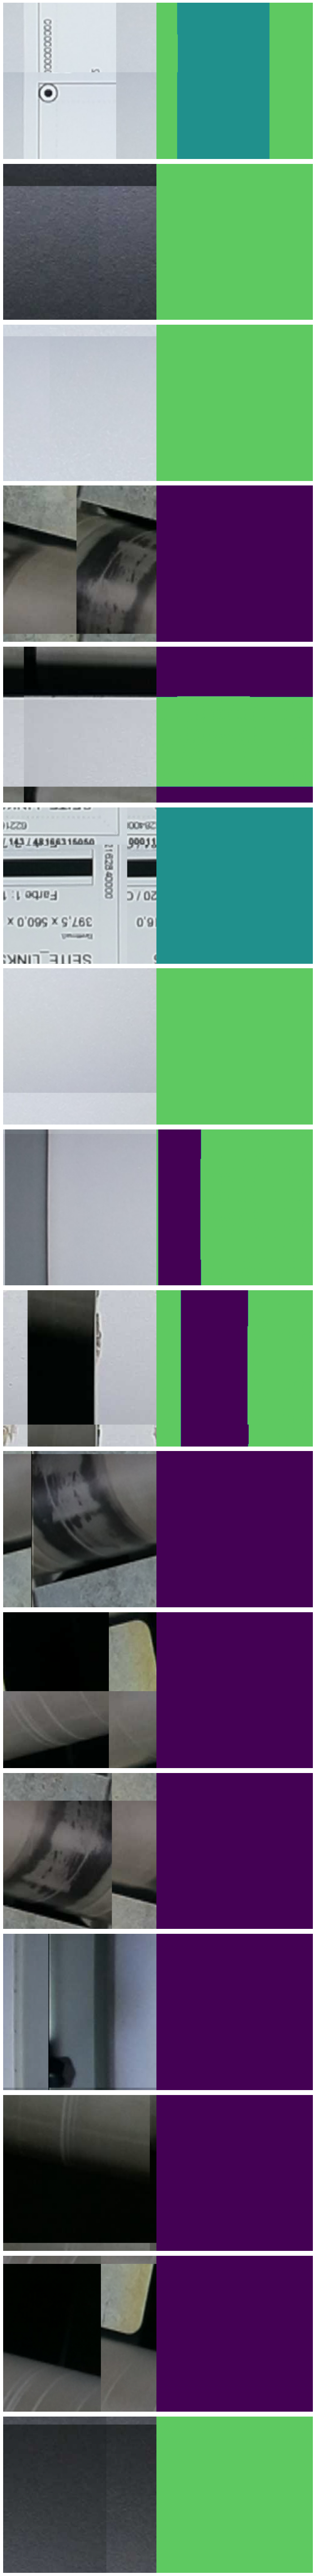

In [7]:
train.plot_batch(3)

img, mask = train.__getitem__(2)
print(img.min())
print(img.max())
print(mask.min())
print(mask.max())
print(train.classes)

In [2]:
reload(model)
from model import generate_model

import tensorflow.keras.losses as losses

model = generate_model()

model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
history = model.fit(x=train, validation_data = validation, epochs=epochs, steps_per_epoch=steps_per_epoch, callbacks=[callback], verbose=1, shuffle=True)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], lw=4, label="loss")
plt.plot(history.history["val_loss"], lw=4, label="val_loss")
plt.legend()

In [ ]:
images, masks = train.__getitem__(2)
preds = model.predict(x=images, verbose=1)

train.plot_prediction(2, preds)

In [ ]:
import pandas as pd
import os

os.mkdir(dir_name)

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = dir_name + '/history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

#save model
model.save(dir_name + "/model.tf", include_optimizer = True)
model.save_weights(dir_name + "/weights.tf")